In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pylab as mpl
def model(params,t):
    N , beta , onset_rate ,t0 \
    = params["N"] , params["beta"] , params["onset_rate"] , params["t0"]
    contact_rate_0 , contact_rate_1 = params["contact_rate"]
    recover_rate_0 , recover_rate_1 = params["recover_rate"]
    
    def contact_rate(t):
        if t<=t0:
            return contact_rate_0
        else:
            return contact_rate_1
    def recover_rate(t):
        if t<=t0:
            return recover_rate_0
        else:
            return recover_rate_1
    def diff(y,t ,N,beta1 , beta2 , contact_rate , onset_rate , recover_rate):
        s , e , i , r ,c = y
        
        ds = - (beta1 * contact_rate(t) * s * e / N) - (beta2 * contact_rate(t) * s * i / N)
        de =  (beta1 * contact_rate(t) * s * e / N) + (beta2 * contact_rate(t) * i * s / N) - onset_rate * e
        di = onset_rate * e - recover_rate(t) * i
        dr = recover_rate(t) * i
        dc = onset_rate * e

        return np.array([ds,de,di,dr,dc])
    res = odeint(
        diff,
        np.array([N-1,1,0,0,0]),
        np.linspace(1,t+1,t),
        args = (    
            N,
            beta / contact_rate_0,
            beta / contact_rate_0 / 2,
            contact_rate,
            onset_rate,
            recover_rate)   
        )
    return res   

In [34]:
#不同接触人数
params = {
    "N":21000,
    "beta" : 0.29,
    "onset_rate" : 0.2,
    "t0" : 7,
    "contact_rate" : [11,6],
    "recover_rate" : [0.2,0.2]
}

In [35]:
params["contact_rate"][1] = 8 #不同移除速率

In [36]:
mpl.rcParams["font.sans-serif"] = ["FangSong"]
mpl.rcParams["axes.unicode_minus"] = False

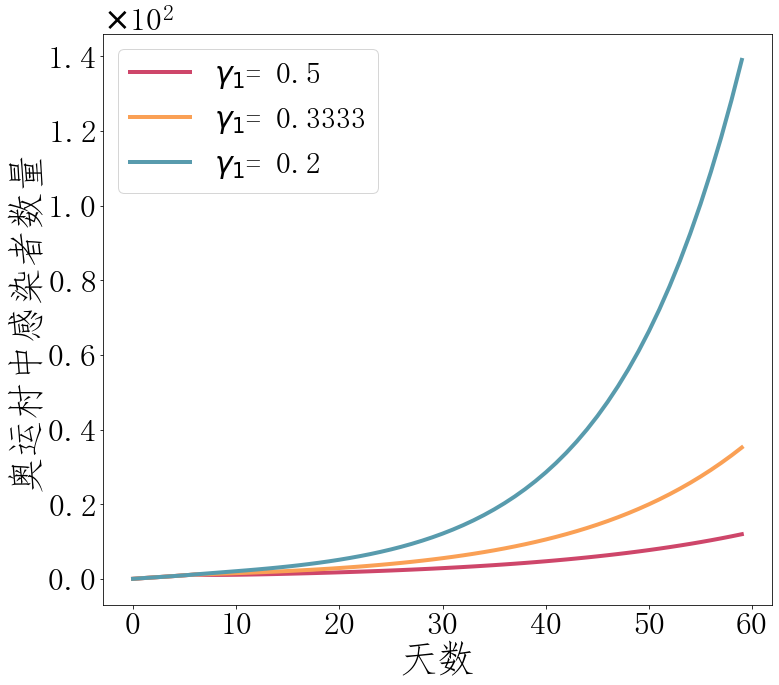

In [37]:
params["recover_rate"][1] = 0.5

plt.figure(figsize=(12,10.5))
ax = plt.gca()
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(42)

res2 = model(params,60)
plt.plot(res2[:,2],label = f"$\gamma_1$= {params['recover_rate'][1]}",color="#CE466A",linewidth=4)

params["recover_rate"][1] = 0.3333
res3 = model(params,60)
plt.plot(res3[:,2],label = f"$\gamma_1$= {params['recover_rate'][1]}",color="#FAA055",linewidth=4)

params["recover_rate"][1] = 0.2
res2 = model(params,60)
plt.plot(res2[:,2],label = f"$\gamma_1$= {params['recover_rate'][1]}",color="#589BAD",linewidth=4)



plt.xlabel(xlabel="天数",fontsize=38)
plt.ylabel(ylabel="奥运村中感染者数量",fontsize=38)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(fontsize=30)